#1. Descargar el dataset:
*   Ir a esta pagina web: https://snap.stanford.edu/data/egonets-Facebook.html
*   Descargar el archivo facebook_conbined.txt.gz
*   Descomprimir y subir a google cloud


#2.Cargar el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Datasets/facebook_combined.txt'

import networkx as nx  # esta libreria se utiliza para crear, manipular y analizar redes o grafos
import matplotlib.pyplot as plt #Utilizaremos esta libreria para crear gráficos

#Cargamos el grafo del archivo

Grafo = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

#Visualizacion básica para ver si hemos cargado bien los datos
print(f"Numero de nodos: {Grafo.number_of_nodes()}")
print(f"Numero de enlaces: {Grafo.number_of_edges()}")
#

Mounted at /content/drive
Numero de nodos: 4039
Numero de enlaces: 88234


#3.Ahora vamos a preparar los datos para su posterior análisis


1.   Densidad
2.   Grado medio
3.   Coeficiente de clústering
4.   Distancia media   
5.   Componentes conexas
6.   Centralidad de grado
7.   Intermediación
8.   Cercanía
9.   Relación clustering - grado



**1.Densidad**

In [ ]:
densidad = nx.density(Grafo)
print(f"Densidad del grafo: {densidad:.4f}") #ponemos 4f para visualizar solo los primeros 4 decimales
#

Densidad del grafo: 0.0108


**2.Grado medio**

Lo podemos hacer de dos formas
La primera: grados = [Grafo.degree(nodo) for nodo in Grafo.nodes()]
*   Recorre cada nodo manualmente con Grafo.nodes() y despues pide el grado de cada nodo con Grafo.degree(nodo)

La segunda: grados = [d for n, d in Grafo.degree()]

*  Grafo.degree() recorre un iterable con tuplas(nodo, grado).
*  

```
# Tiene formato de código
```

Lo recorre directamente y extrae solo el grado por lo que es más eficiente


In [ ]:
grados = [Grafo.degree(nodo) for nodo in Grafo.nodes()]
grado_medio = sum(grados) / len(grados)
print(f"Grado medio del grafo: {grado_medio:.2f}")

Grado medio del grafo: 43.69


In [ ]:
grados = [d for n, d in Grafo.degree()]
grado_medio = sum(grados) / len(grados)
print(f"Grado medio: {grado_medio:.2f}")

Grado medio: 43.69


**Coeficiente del clústering**

Miide cuanto tienden los vecinos de un nodo a estar conectados entre si.
Para un nodo la formula sería:
C(u) = nº de enlaces entre vecinos de u / nº máximo de enlaces posibles entre ellos

In [ ]:
clustering = nx.average_clustering(Grafo)
print(f"Coeficiente de clústering: {clustering:.4f}")

Coeficiente de clústering: 0.6055


**Distancia media**

Explicacion del codigo:


*   nx.connected_components(Grafo) devuelve un generador de conjuntos de nodos; cada conjunto representa un grupo de nodos conectados entre si.
*    max(nx.connected_components(Grafo), key=len) selecciona el componene que más nodos tiene
*   Subgrafo es un nuevo objeto grafo que contiene solo los nodos y enlaces del componente principal
*   dist_media = nx.average_shortest_path_length(subgrafo) mide la distancia promedio entre todos los pares de nodos dentro del subgrafo. En el caso de una red social representaría cuantos 'saltos de amistad' hay, de media, entre dos personas.
*   Elemento de lista



In [ ]:
Grafo_CC = max(nx.connected_components(Grafo), key=len)
subgrafo = Grafo.subgraph(Grafo_CC)
distancia_media = nx.average_shortest_path_length(subgrafo) #Tarda unos minutos casi 6
print(f"Distancia media: {distancia_media:.2f}")


Distancia media: 3.69


**Componentes Conexas**

una componente conexa es un grupo de nodos donde cada nodo esta conectado directa o indirectamnte

In [ ]:
componentes = nx.number_connected_components(Grafo)
print(f"Numero de componentes conexas: {componentes}")

Numero de componentes conexas: 1


**Centralidad de grado**

Mide la cantidad de conexiones directas que tiene un nodo con otros nodos
Su formula sería grado(u) / (n-1)

In [ ]:
centralidad_grado = nx.degree_centrality(Grafo) #podriamos añadir k = 500 para que seleccionara una muestra aleatoria de 500 nodos, es más rápida pero menos precisa
print(f"Centralidad de grado: {centralidad_grado}")

Centralidad de grado: {0: 0.08593363051015354, 1: 0.004210004952947003, 2: 0.0024764735017335313, 3: 0.004210004952947003, 4: 0.0024764735017335313, 5: 0.0032194155522535907, 6: 0.0014858841010401188, 7: 0.004952947003467063, 8: 0.001981178801386825, 9: 0.014115898959881128, 10: 0.0024764735017335313, 11: 0.00024764735017335313, 12: 0.00024764735017335313, 13: 0.007677067855373947, 14: 0.003714710252600297, 15: 0.00024764735017335313, 16: 0.002228826151560178, 17: 0.0032194155522535907, 18: 0.00024764735017335313, 19: 0.00396235760277365, 20: 0.003714710252600297, 21: 0.016097077761267953, 22: 0.0027241208519068845, 23: 0.004210004952947003, 24: 0.00396235760277365, 25: 0.017087667161961365, 26: 0.016840019811788013, 27: 0.0012382367508667657, 28: 0.0032194155522535907, 29: 0.0032194155522535907, 30: 0.004210004952947003, 31: 0.005695889053987122, 32: 0.0014858841010401188, 33: 0.0004952947003467063, 34: 0.0012382367508667657, 35: 0.0004952947003467063, 36: 0.0027241208519068845, 37: 0

**Intermediación**

Mide cuantas veces un nodo apararece en los caminos más cortos entre pares de otros nodos
Puede tardar un poco, unos 3 min

In [ ]:
intermediacion = nx.betweenness_centrality(Grafo)
print(f"Intermediación: {intermediacion}")
#

Intermediación: {0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.67327495437831

**Cercanía**

Mide que tan 'cerca' está un nodo del resto de nodos, en promedio
La formula simplificada sería: 1 / sum(distancias mínimas desde u al resto)

In [ ]:
cercania = nx.closeness_centrality(Grafo)
print(f"Cercanía: {cercania}")

Cercanía: {0: 0.35334266713335666, 1: 0.2613761408505405, 2: 0.26125776397515527, 3: 0.2613761408505405, 4: 0.26125776397515527, 5: 0.2613084837895554, 6: 0.26119016817593793, 7: 0.2747686445291236, 8: 0.2612239617026782, 9: 0.2620546433902265, 10: 0.26125776397515527, 11: 0.26110572259941806, 12: 0.26110572259941806, 13: 0.26161321671525756, 14: 0.2613423079412336, 15: 0.26110572259941806, 16: 0.2612408617454875, 17: 0.2613084837895554, 18: 0.26110572259941806, 19: 0.2613592233009709, 20: 0.2613423079412336, 21: 0.2756125861715924, 22: 0.2612746683921061, 23: 0.2613761408505405, 24: 0.2613592233009709, 25: 0.26225888160031174, 26: 0.26224184959085595, 27: 0.2611732746911584, 28: 0.2613084837895554, 29: 0.2613084837895554, 30: 0.2613761408505405, 31: 0.2614776921582594, 32: 0.26119016817593793, 33: 0.26112260734609416, 34: 0.3033125516412529, 35: 0.26112260734609416, 36: 0.2612746683921061, 37: 0.26110572259941806, 38: 0.2612408617454875, 39: 0.2613423079412336, 40: 0.26183374400207493

**Relación entre clustering y grado**

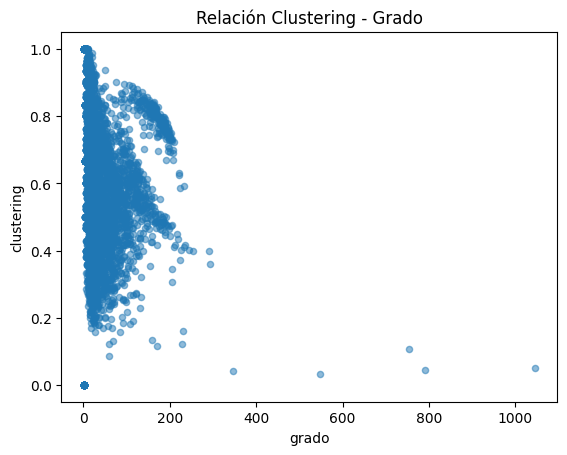

In [ ]:
import pandas as pd

df_cygrado = pd.DataFrame({
    'grado': [Grafo.degree(n) for n in Grafo.nodes()],
    'clustering': [nx.clustering(Grafo, n) for n in Grafo.nodes()]
})

df_cygrado.plot.scatter(x='grado', y='clustering', alpha=0.5, title='Relación Clustering - Grado')
plt.show()


# Análisis de la estructura general del grafo


*   Número de nodos obtenidos: 4039 --> esto quiere decir que hay 4039 usuarios en la red
*   Número de enlaces: 88234 --> es el nº de amistades totales entre ellos
*   Densidad del grafo: 0.0108 --> Quiere decir los usuarios tienen pocas conexiones en comparación a las que podrían tener
*   Grado medio: 43.69 --> Es el nº de amistades que tiene cada usuario de media
*   Coef. de clustering medio: 0.6055 --> esto quiere decir que hay una alta probabilidad de que se formen grupos cerrados de vecinos
*   Distancia media: 3.69 --> los usuarios pueden llegar a cualquier otro a traves de 3.7 amistades. Esto significa que la red presenta un comportamiento tipo 'mundo pequeño', similar a las redes sociales reales, donde la conexion global se logra con un nº bajo de intermediarios.
*   Número de componentes conexas: 1 --> esto quiere decir que toda la red está conectada, no hay ningun grupo aislado.

**Analisis de las centralidades***

Como son muchas, vamos a analizar el top 10

In [ ]:
import matplotlib.pyplot as plt

from collections import Counter
def top10(diccionario):
    return dict(sorted(diccionario.items(), key=lambda item: item[1], reverse=True)[:10])
# Extraer top 10
top_grado = top10(centralidad_grado)
top_intermediacion = top10(intermediacion)
top_cercania = top10(cercania)
print(top_grado)
print(top_intermediacion)
print(top_cercania)


{107: 0.258791480931154, 1684: 0.1961367013372957, 1912: 0.18697374938088163, 3437: 0.13546310054482416, 0: 0.08593363051015354, 2543: 0.07280832095096582, 2347: 0.07206537890044576, 1888: 0.0629024269440317, 1800: 0.06067360079247152, 1663: 0.058197127290737984}
{107: 0.4805180785560152, 1684: 0.3377974497301992, 3437: 0.23611535735892905, 1912: 0.2292953395868782, 1085: 0.14901509211665306, 0: 0.14630592147442917, 698: 0.11533045020560802, 567: 0.09631033121856215, 58: 0.08436020590796486, 428: 0.06430906239323866}
{107: 0.45969945355191255, 58: 0.3974018305284913, 428: 0.3948371956585509, 563: 0.3939127889961955, 1684: 0.39360561458231796, 171: 0.37049270575282134, 348: 0.36991572004397216, 483: 0.3698479575013739, 414: 0.3695433330282786, 376: 0.36655773420479304}


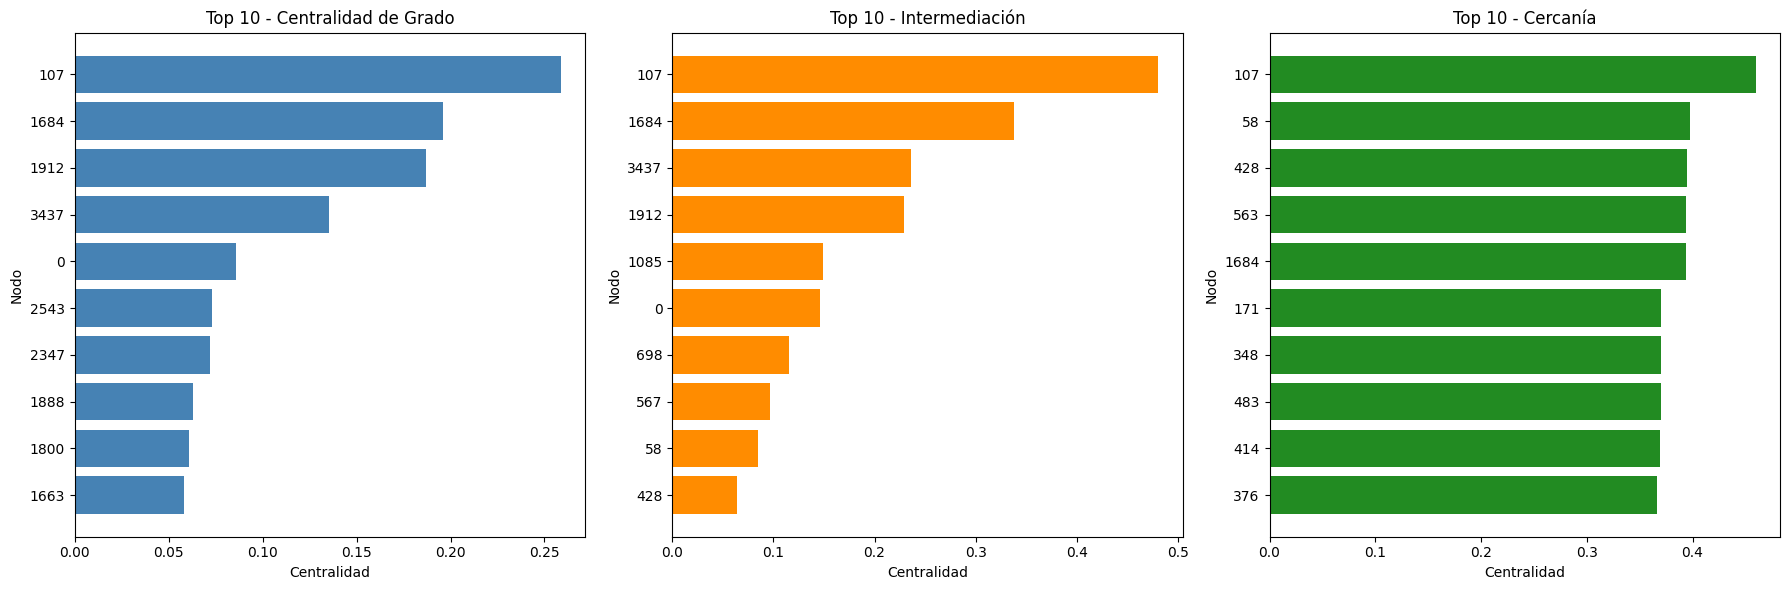

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grado
axs[0].barh(
    [str(n) for n in list(top_grado.keys())[::-1]],
    list(top_grado.values())[::-1],
    color='steelblue'
)
axs[0].set_title("Top 10 - Centralidad de Grado")
axs[0].set_xlabel("Centralidad")
axs[0].set_ylabel("Nodo")

# Intermediación
axs[1].barh(
    [str(n) for n in list(top_intermediacion.keys())[::-1]],
    list(top_intermediacion.values())[::-1],
    color='darkorange'
)
axs[1].set_title("Top 10 - Intermediación")
axs[1].set_xlabel("Centralidad")
axs[1].set_ylabel("Nodo")

# Cercanía
axs[2].barh(
    [str(n) for n in list(top_cercania.keys())[::-1]],
    list(top_cercania.values())[::-1],
    color='forestgreen'
)
axs[2].set_title("Top 10 - Cercanía")
axs[2].set_xlabel("Centralidad")
axs[2].set_ylabel("Nodo")

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Crear un DataFrame con los top 10 ordenados
tabla_top10 = pd.DataFrame({
    'Nodo (Grado)': list(top_grado.keys()),
    'Centralidad de Grado': list(top_grado.values()),
    'Nodo (Intermediación)': list(top_intermediacion.keys()),
    'Intermediación': list(top_intermediacion.values()),
    'Nodo (Cercanía)': list(top_cercania.keys()),
    'Cercanía': list(top_cercania.values())
})
tabla_top10_centralidad = pd.DataFrame({
    'Nodo (Grado)': list(top_grado.keys()),
    'Centralidad de Grado': list(top_grado.values()),

})
tabla_top10_intermediacion = pd.DataFrame({
    'Nodo (Intermediación)': list(top_intermediacion.keys()),
    'Intermediación': list(top_intermediacion.values())
})
tabla_top10_cercania = pd.DataFrame({
    'Nodo (Cercanía)': list(top_cercania.keys()),
    'Cercanía': list(top_cercania.values())
})

# Mostrar la tabla
tabla_top10_centralidad
tabla_top10_intermediacion
#tabla_top10_cercania


,Nodo (Intermediación),Intermediación
0,107,0.480518
1,1684,0.337797
2,3437,0.236115
3,1912,0.229295
4,1085,0.149015
5,0,0.146306
6,698,0.115330
7,567,0.096310
8,58,0.084360
9,428,0.064309
